In [2]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
train_modified = pd.read_pickle("./train_modified.pkl")
test_modified = pd.read_pickle("./test_modified.pkl")

## Machine learning models

The distinction between the training set, validation set, and the test set is fundamentally important to applying machine learning methods in practice. Evaluating more than one model on the test set and choesing the better of the two will result in a overly optimistic estimate of how accurate the model is.

split the training data into training+validation set and test set

In [4]:
X = train_modified.drop("Category", axis=1)
y = train_modified["Category"]
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

split train+validation set into training and validation set

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

### Decision Trees 

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [7]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [8]:
print("Train accuracy:" + str(np.round(tree.score(X_train, y_train),2)))
print("Validation accuracy:" +  str(np.round(tree.score(X_valid, y_valid),2)))

Train accuracy:0.9
Validation accuracy:0.22


As we can see, the deafault setting of fully developing the tree causes overfitting!!

#### Exploring max_depth

Let's try to set max_deph. It's a pre-pruning method, which will stop developing the tree before we perfectly fit to the training data.

In [9]:
tree_scores = {}
tree_scores['max_depth'] = []
tree_scores['Train accuracy'] = []
tree_scores['Validation accuracy'] = []
for max_depht in np.arange(1,16,1):
    tree = DecisionTreeClassifier(max_depth=max_depht, random_state=0)
    tree.fit(X_train, y_train)
    tree_scores['max_depth'].append(max_depht)
    tree_scores['Train accuracy'].append(tree.score(X_train, y_train))
    tree_scores['Validation accuracy'].append(tree.score(X_valid, y_valid))


In [10]:
my_df = pd.DataFrame(tree_scores)
my_df

,max_depth,Train accuracy,Validation accuracy
0,1,0.203231,0.203384
1,2,0.217450,0.217324
2,3,0.220598,0.220216
3,4,0.226851,0.227019
4,5,0.235215,0.235547
5,6,0.244085,0.243546
6,7,0.252601,0.252044
7,8,0.260163,0.258725
8,9,0.266684,0.262516
9,10,0.274322,0.267095


As we can see, in this case the best value for max_depth hyperparameter is 13. However, both training and validation accuracy aren't high..

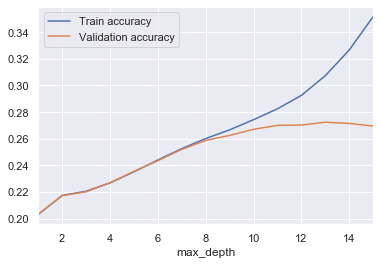

In [11]:
my_df.plot(x='max_depth')

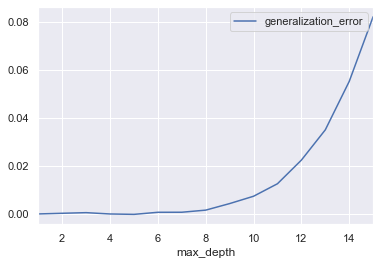

In [12]:
my_df['generalization_error'] = my_df['Train accuracy'] - my_df['Validation accuracy']
my_df[['generalization_error','max_depth']].plot(x='max_depth')

 #### Exploring min_samples_split

Let's try to set min_samples_split. It is the minimum number of samples required to split an internal node

In [13]:
tree_scores = {}
tree_scores['min_samples_split'] = []
tree_scores['Train accuracy'] = []
tree_scores['Validation accuracy'] = []
for min_samples_split in np.arange(10,800,20):
    tree = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=0)
    tree.fit(X_train, y_train)
    tree_scores['min_samples_split'].append(min_samples_split)
    tree_scores['Train accuracy'].append(tree.score(X_train, y_train))
    tree_scores['Validation accuracy'].append(tree.score(X_valid, y_valid))

In [14]:
my_df = pd.DataFrame(tree_scores)
my_df

,min_samples_split,Train accuracy,Validation accuracy
0,10,0.582640,0.225840
1,30,0.427540,0.248065
2,50,0.382483,0.258622
3,70,0.359430,0.264423
4,90,0.345560,0.268250
5,110,0.335836,0.270612
6,130,0.328486,0.272210
7,150,0.323026,0.274020
8,170,0.318636,0.275101
9,190,0.314842,0.275399


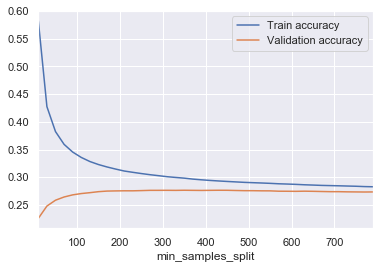

In [15]:
my_df.plot(x='min_samples_split')

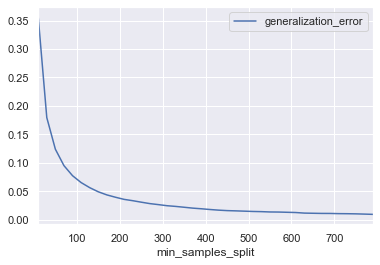

In [16]:
my_df['generalization_error'] = my_df['Train accuracy'] - my_df['Validation accuracy']
my_df[['generalization_error','min_samples_split']].plot(x='min_samples_split')

#### Exploring min_samples_leaf

Let's try to set min_samples_leaf, that represents the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.

In [17]:
tree_scores = {}
tree_scores['min_samples_leaf'] = []
tree_scores['Train accuracy'] = []
tree_scores['Validation accuracy'] = []
for min_samples_leaf in np.arange(2,35,1):
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=0)
    tree.fit(X_train, y_train)
    tree_scores["min_samples_leaf"].append(min_samples_leaf)
    tree_scores['Train accuracy'].append(tree.score(X_train, y_train))
    tree_scores['Validation accuracy'].append(tree.score(X_valid, y_valid))

In [18]:
my_df = pd.DataFrame(tree_scores)
my_df

,min_samples_leaf,Train accuracy,Validation accuracy
0,2,0.695263,0.220653
1,3,0.613197,0.224832
2,4,0.559386,0.227669
3,5,0.520864,0.230754
4,6,0.492142,0.235522
5,7,0.470186,0.238359
6,8,0.452715,0.240855
7,9,0.438464,0.243650
8,10,0.426672,0.246517
9,11,0.417058,0.248430


Grid Search with Cross-validation

In [19]:
import numpy as np

In [20]:
param_grid = {'max_depth':[12, 18, 24], 'min_samples_split':[100, 300, 500, 700], 'min_samples_leaf':[10, 20, 30, 40, 50]}

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [22]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Validation set score:{:.2f}".format(grid_search.score(X_valid, y_valid)))

C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Validation set score:0.28


In [23]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.581564,0.090409,0.104106,0.008015,12,10,100,"{'max_depth': 12, 'min_samples_leaf': 10, 'min...",0.270029,0.271480,...,0.270319,0.000937,36,0.287465,0.286801,0.287796,0.288664,0.288560,0.287857,0.000696
1,3.439032,0.090189,0.096435,0.003811,12,10,300,"{'max_depth': 12, 'min_samples_leaf': 10, 'min...",0.270586,0.270944,...,0.270641,0.000708,33,0.281386,0.280792,0.281099,0.282140,0.282142,0.281512,0.000547
2,3.352765,0.019081,0.105851,0.006258,12,10,500,"{'max_depth': 12, 'min_samples_leaf': 10, 'min...",0.269452,0.270549,...,0.269766,0.001064,42,0.278017,0.277401,0.277723,0.278437,0.278401,0.277996,0.000397
3,3.284138,0.018270,0.101040,0.006892,12,10,700,"{'max_depth': 12, 'min_samples_leaf': 10, 'min...",0.268774,0.268737,...,0.268608,0.001043,52,0.275311,0.274361,0.274835,0.275717,0.275655,0.275176,0.000514
4,3.511273,0.020560,0.109233,0.002632,12,20,100,"{'max_depth': 12, 'min_samples_leaf': 20, 'min...",0.270424,0.271298,...,0.270187,0.001056,37,0.287252,0.286454,0.287515,0.288320,0.288276,0.287564,0.000694


In [24]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=18,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


#### Metrics

In [25]:
tree = DecisionTreeClassifier(max_depth=18, min_samples_leaf=30, min_samples_split=300, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(tree.score(X_train, y_train)))
print("Accuracy on validation set: {:.2f}".format(tree.score(X_valid, y_valid)))

Accuracy on training set: 0.30
Accuracy on validation set: 0.28


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

tree_pred = tree.predict(X_valid)
print("Accuracy: {:.3f}".format(accuracy_score(y_valid, tree_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_valid, tree_pred)))

Accuracy: 0.276
Confusion matrix:
[[   81  1791  2481 ...     0     0     0]
 [   92  8307  7511 ...     0     0     0]
 [   61  3666 21848 ...     0     0     0]
 ...
 [    0    12    42 ...     0     0     0]
 [    1   130   187 ...     0     0     0]
 [    0     1     1 ...     0     0     0]]


In [42]:
print(classification_report(y_valid, tree_pred))

C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.13      0.01      0.02      7838
           2       0.27      0.35      0.30     23932
           3       0.31      0.66      0.42     32857
           4       0.23      0.20      0.22     10027
           5       0.14      0.02      0.03      8405
           6       0.22      0.19      0.20     17303
           7       0.12      0.00      0.01      4278
           8       0.17      0.18      0.18     14281
           9       0.00      0.00      0.00      1589
          10       0.15      0.07      0.10      6898
          11       0.00      0.00      0.00      5851
          12       0.00      0.00      0.00       815
          13       0.14      0.03      0.05      1964
          14       0.32      0.40      0.36     10258
          15       0.00      0.00      0.00       886
          16       0.38      0.01      0.01      1864
          17       0.21      0.02      0.03      1386
          18       0.42    

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier (n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(forest.score(X_train, y_train)))
print("Accuracy on validation set: {:.2f}".format(forest.score(X_valid, y_valid)))

Accuracy on training set: 0.90
Accuracy on validation set: 0.30


How we can see, the algorithm tend to overfit.
Let's try to tune the hyperparameters

#### Exploring min_samples_split

Let's try to set min_samples_split.

In [27]:
random_scores = {}
random_scores['min_samples_split'] = []
random_scores['Train accuracy'] = []
random_scores['Validation accuracy'] = []
for min_samples_split in np.arange(10,800,20):
    forest = RandomForestClassifier(min_samples_split=min_samples_split, random_state=0)
    forest.fit(X_train, y_train)
    random_scores['min_samples_split'].append(min_samples_split)
    random_scores['Train accuracy'].append(forest.score(X_train, y_train))
    random_scores['Validation accuracy'].append(forest.score(X_valid, y_valid))

C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\l

C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\l

In [28]:
my_df = pd.DataFrame(random_scores)
my_df

,min_samples_split,Train accuracy,Validation accuracy
0,10,0.675583,0.286138
1,30,0.453888,0.290292
2,50,0.393481,0.290797
3,70,0.364325,0.288926
4,90,0.347524,0.288628
5,110,0.336680,0.287881
6,130,0.328306,0.287116
7,150,0.321851,0.288209
8,170,0.316289,0.285749
9,190,0.313056,0.285178


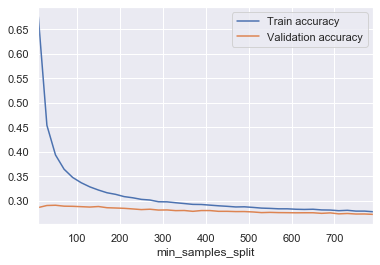

In [29]:
my_df.plot(x='min_samples_split')

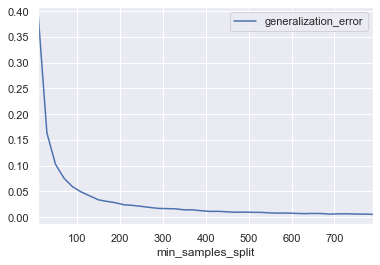

In [30]:
my_df['generalization_error'] = my_df['Train accuracy'] - my_df['Validation accuracy']
my_df[['generalization_error','min_samples_split']].plot(x='min_samples_split')

#### Exploring max_depth

Let's try to set max_deph

In [31]:
random_scores = {}
random_scores['max_depth'] = []
random_scores['Train accuracy'] = []
random_scores['Validation accuracy'] = []
for max_depht in np.arange(1,16,1):
    forest = RandomForestClassifier(max_depth=max_depht, random_state=0)
    forest.fit(X_train, y_train)
    random_scores['max_depth'].append(max_depht)
    random_scores['Train accuracy'].append(forest.score(X_train, y_train))
    random_scores['Validation accuracy'].append(forest.score(X_valid, y_valid))


C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\l

In [32]:
my_df = pd.DataFrame(random_scores)
my_df

,max_depth,Train accuracy,Validation accuracy
0,1,0.199649,0.199576
1,2,0.214927,0.214749
2,3,0.222481,0.222633
3,4,0.225480,0.224893
4,5,0.235919,0.235304
5,6,0.245496,0.244482
6,7,0.249780,0.249031
7,8,0.257883,0.256599
8,9,0.264771,0.261270
9,10,0.276585,0.269719


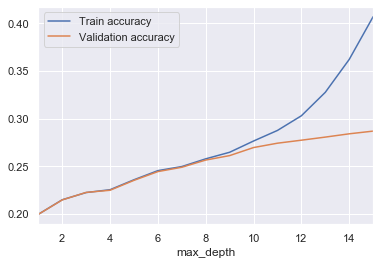

In [33]:
my_df.plot(x='max_depth')

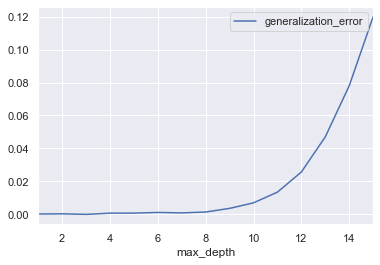

In [34]:
my_df['generalization_error'] = my_df['Train accuracy'] - my_df['Validation accuracy']
my_df[['generalization_error','max_depth']].plot(x='max_depth')

#### Exploring min_samples_leaf

Let's try to set min_samples_leaf..

In [35]:
random_scores = {}
random_scores['min_samples_leaf'] = []
random_scores['Train accuracy'] = []
random_scores['Validation accuracy'] = []
for min_samples_leaf in np.arange(2,35,1):
    forest = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=0)
    forest.fit(X_train, y_train)
    random_scores["min_samples_leaf"].append(min_samples_leaf)
    random_scores['Train accuracy'].append(forest.score(X_train, y_train))
    random_scores['Validation accuracy'].append(forest.score(X_valid, y_valid))

C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\angel\Anaconda3\envs\py37\l

In [36]:
my_df = pd.DataFrame(random_scores)
my_df

,min_samples_leaf,Train accuracy,Validation accuracy
0,2,0.814413,0.282220
1,3,0.716413,0.288009
2,4,0.638054,0.289691
3,5,0.580832,0.290876
4,6,0.537908,0.291562
5,7,0.505590,0.290657
6,8,0.480737,0.291768
7,9,0.460859,0.290450
8,10,0.444457,0.292030
9,11,0.430508,0.290274


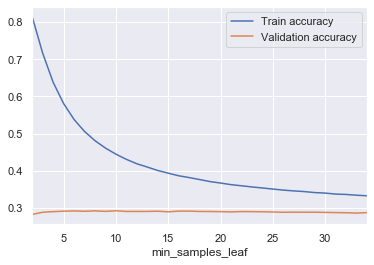

In [37]:
my_df.plot(x='min_samples_leaf')

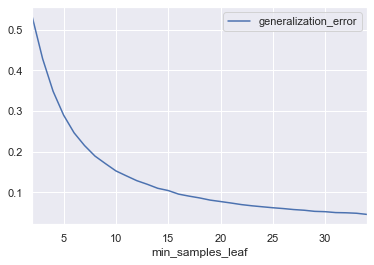

In [38]:
my_df['generalization_error'] = my_df['Train accuracy'] - my_df['Validation accuracy']
my_df[['generalization_error','min_samples_leaf']].plot(x='min_samples_leaf')

#### Metrics

In [39]:
forest = RandomForestClassifier (n_estimators = 100, min_samples_leaf = 34, max_depth = 12, min_samples_split = 170, random_state = 0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(forest.score(X_train, y_train)))
print("Accuracy on validation set: {:.2f}".format(forest.score(X_valid, y_valid)))

Accuracy on training set: 0.29
Accuracy on validation set: 0.28


In [43]:
forest_pred = forest.predict(X_valid)
print("Accuracy: {:.3f}".format(accuracy_score(y_valid, forest_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_valid, forest_pred)))

Accuracy: 0.279
Confusion matrix:
[[    0  1733  3324 ...     0     0     0]
 [    0  8010 10082 ...     0     0     0]
 [    0  3005 26027 ...     0     0     0]
 ...
 [    0    10    54 ...     0     0     0]
 [    0   112   275 ...     0     0     0]
 [    0     2     2 ...     0     0     0]]


In [44]:
print(classification_report(y_valid, forest_pred))

C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      7838
           2       0.30      0.33      0.31     23932
           3       0.28      0.79      0.41     32857
           4       0.24      0.19      0.21     10027
           5       1.00      0.00      0.00      8405
           6       0.26      0.09      0.14     17303
           7       0.00      0.00      0.00      4278
           8       0.18      0.16      0.17     14281
           9       0.00      0.00      0.00      1589
          10       0.21      0.01      0.01      6898
          11       0.00      0.00      0.00      5851
          12       0.00      0.00      0.00       815
          13       0.00      0.00      0.00      1964
          14       0.31      0.39      0.35     10258
          15       0.00      0.00      0.00       886
          16       0.00      0.00      0.00      1864
          17       0.67      0.00      0.00      1386
          18       0.53    